In [186]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [187]:
mx.__version__,gcv.__version__

('1.5.1', '0.5.0')

In [188]:
# Import the image

image = mx.image.imread('Images/fuji.jpeg')


In [189]:
image.shape

(415, 739, 3)

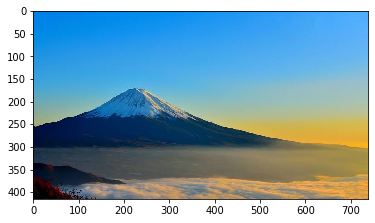

In [190]:
plt.imshow(image.asnumpy())

In [191]:
# Transform and Batch image

image_t = gcv.data.transforms.presets.imagenet.transform_eval(image)

In [192]:
image_t.shape

(1, 3, 224, 224)

<b>It is of the format (batch,channels,width,height)

In [193]:
# Load the model

network = gcv.model_zoo.resnet101_v1d(pretrained=True)

In [194]:
#Prediction

prediction = network(image_t)

In [195]:
prediction.shape

(1, 1000)

In [196]:
prediction = prediction[0]

In [197]:
# Calculate probability

probability = mx.nd.softmax(prediction)
rounded_probability = mx.nd.round(probability*100)/100

In [198]:
# Get Top-k

k = 10
topk_indices = mx.nd.topk(probability,k=k)

In [199]:
topk_indices


[980. 970. 908. 107. 975. 979. 978. 672. 339. 976.]
<NDArray 10 @cpu(0)>

#1 volcano (90.1%)
#2 alp (0.139%)
#3 wing (0.0733%)
#4 jellyfish (0.0636%)
#5 lakeside (0.0601%)
#6 valley (0.0453%)
#7 seashore (0.038%)
#8 mountain tent (0.035%)
#9 sorrel (0.0283%)
#10 promontory (0.0279%)


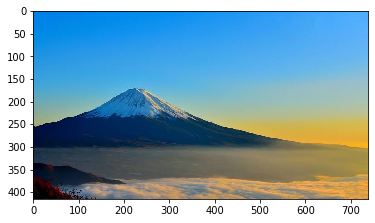

In [200]:
# Get class Labels
plt.imshow(image.asnumpy())

for i in range(k):
    class_index = topk_indices[i].astype('int').asscalar()
    class_label = network.classes[class_index]
    class_probability = probability[class_index]
    
    print('#{} {} ({:0.3}%)'.format(i+1,class_label,class_probability.asscalar()*100))
